# Used Car Price Prediction - CarDekho Dataset
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Collecting Data
* Exploratory Data Analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choosing optimal model

## 1) Problem statement.

* This dataset comprises data on used cars and their respective features, which are sold on cardehko.com in India. 
* The purpose is to build a model where user can predict the price of the car based on input features.
* These prediction results can be used to give new seller the price suggestion based on market condition.

## 2) Data Collection
* Given data is collected from cardekho.com through web scraping
* Data used in this project is taken from Kaggle website

### 2.1 Import Data and Required Packages

**Importing packages**

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

**Importing Cardekho dataset**

In [227]:
df = pd.read_csv("cardekho_imputated.csv", index_col = [0])

**First 10 Observations**

In [228]:
df.head(10)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


**Shape of dataset**

In [229]:
df.shape

(15411, 13)

**Summary Statisitics of dataset**

In [230]:
df.describe().apply(lambda x:x.apply('{0:.4f}'.format))

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.0000,15411.0000,15411.0000,15411.0000,15411.0000,15411.0000,15411.0000
mean,6.0363,55616.4806,19.7012,1486.0578,100.5883,5.3255,774971.1164
std,3.0133,51618.5484,4.1713,521.1067,42.9730,0.8076,894128.3633
min,0.0000,100.0000,4.0000,793.0000,38.4000,0.0000,40000.0000
25%,4.0000,30000.0000,17.0000,1197.0000,74.0000,5.0000,385000.0000
50%,6.0000,50000.0000,19.6700,1248.0000,88.5000,5.0000,556000.0000
75%,8.0000,70000.0000,22.7000,1582.0000,117.3000,5.0000,825000.0000
max,29.0000,3800000.0000,33.5400,6592.0000,626.0000,9.0000,39500000.0000


**Checking datatypes and non-null counts**

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


**Report**
*There are 13 columns, 6 object types and 7 number types*

## 3) Exploratory Data Analysis

**Extracting numerical features and continuous features**

In [232]:
df1 = df.copy()
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes !='object']
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes =='object']

In [233]:
#Printing both kind of features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

**Proportion counts of various categories among categorical variables**

In [234]:
df2 = df.copy()
for elem in categorical_features:
    print(f"For the feature '{elem}', we have the following proportion data")
    print(df2[elem].value_counts(normalize = True)*100)
    print("!-----------------------------------------!")

For the feature 'car_name', we have the following proportion data
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
!-----------------------------------------!
For the feature 'brand', we have the following proportion data
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep      

## Univariate Analysis

### Numerical Features

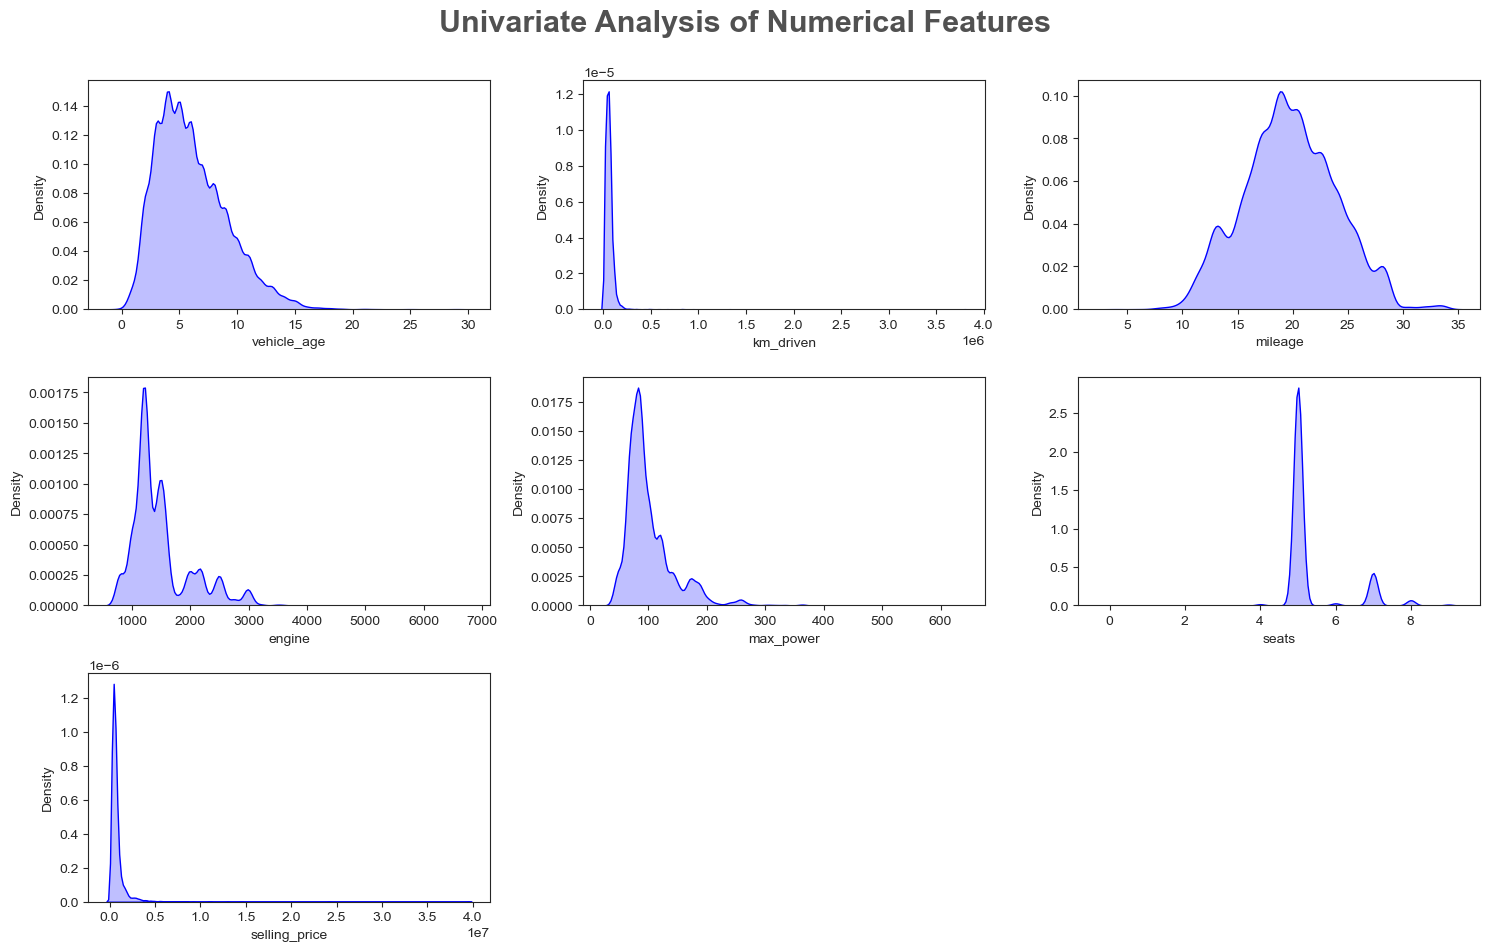

In [235]:
df3 = df.copy()
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize= 22, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df3[numerical_features[i]], shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

#save fig
plt.savefig(r"C:\Users\saad1\Univariate_Num")

**Report**
* Vehicle_age, km_driven, engine, max_power and selling_price is Right Skewed.
* Outliers present in km_driven, engine, max_power and selling_price.

### Categorical Features

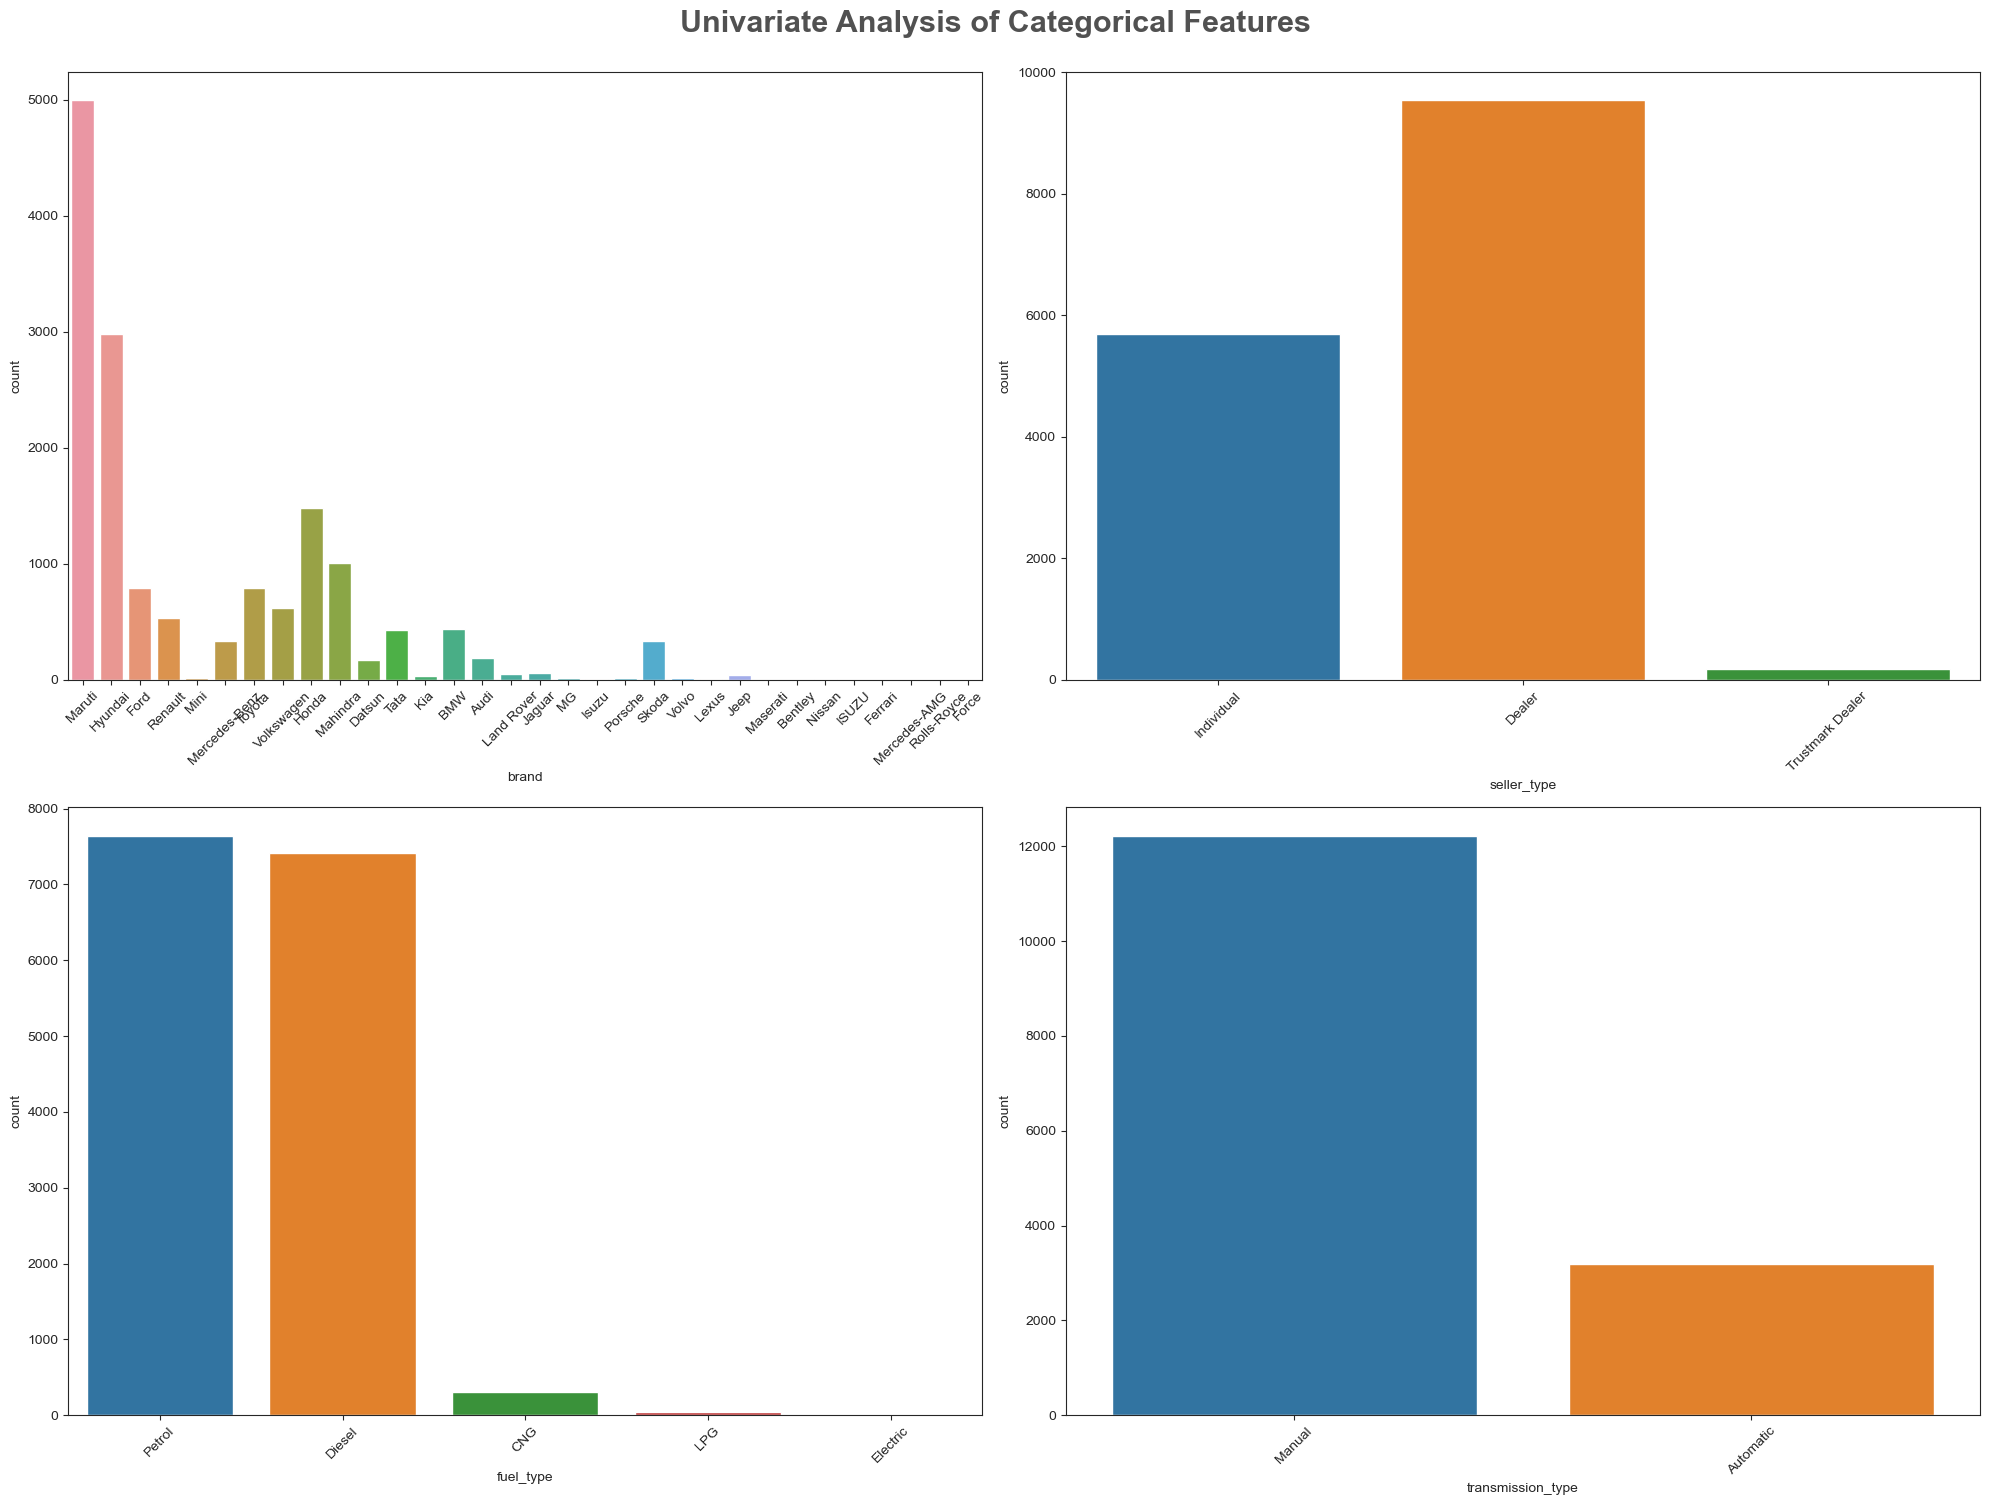

In [236]:
df3 = df.copy()
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize= 22, fontweight='bold', alpha=0.8, y=1)
#Excluding 'car_name' and 'model' for visualization purposes
cat = ['brand','seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat)):
   
    plt.subplot(2,2,i+1)
    sns.countplot(df3[cat[i]])
    plt.xlabel(cat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#save fig
plt.savefig(r"C:\Users\saad1\Univariate_Cat")

## Multivariate Analysis

**Correlation between Numerical Features**

In [237]:
df.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


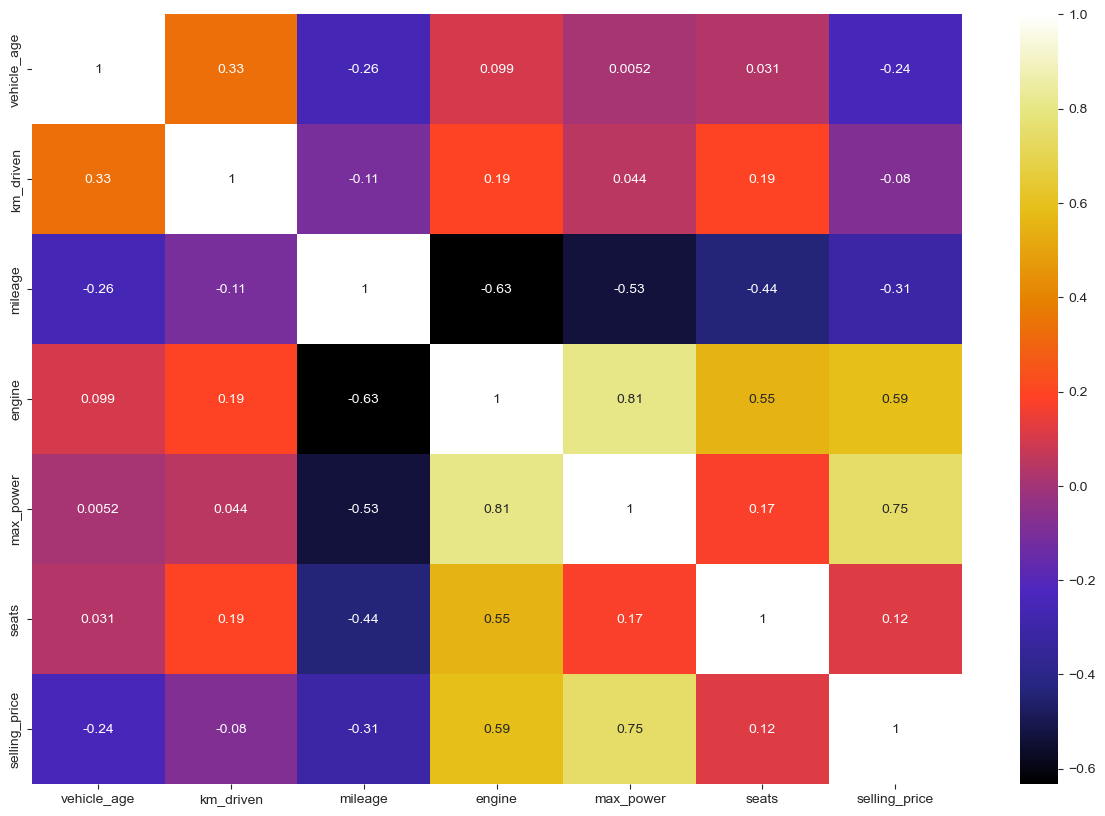

In [238]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap ="CMRmap", annot=True)
plt.show()

**Report**
* Relative strong correlation between max_power and selling_price
* Moderate correlation between engine and selling_price


### Null Value Inspection

In [239]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**Report**
* No null values present 

**Extracting Continuous and Discrete Features from Numerical Features**

In [240]:
continuous_features = [feature for feature in numerical_features if len(df[feature].unique())>=10]
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<10]

In [241]:
#printing
print('List of continuous features :',continuous_features)
print('List of discrete features :', discrete_features)

List of continuous features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']
List of discrete features : ['seats']


**Scatter plot between continuous features and selling_price**

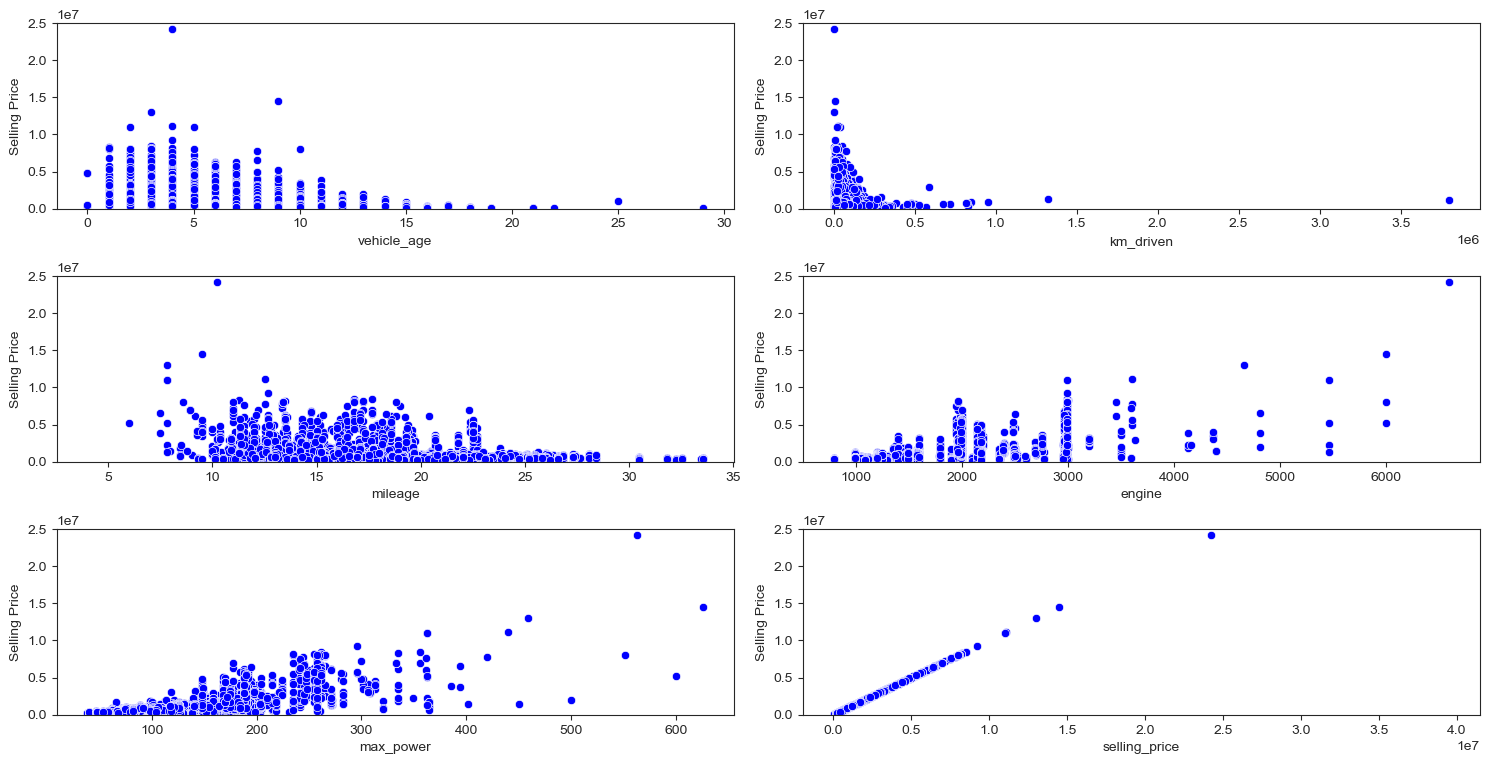

In [242]:
fig = plt.figure(figsize = (15,20))

for i in range(0,len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data = df, y='selling_price', x= continuous_features[i], color='b')
    plt.ylim(0,25000000)
    plt.ylabel('Selling Price')
    plt.xlabel(continuous_features[i])
    plt.tight_layout()
    
     

**Report**
* As the vehicle_age and km_driven increases, selling_price reduces.
* There is no fixed pattern between mileage and selling_price, it is dependent on other features.
* There is a positive relationship between selling_price and max_power.

**Bar plot between discrete features and  median selling_price**

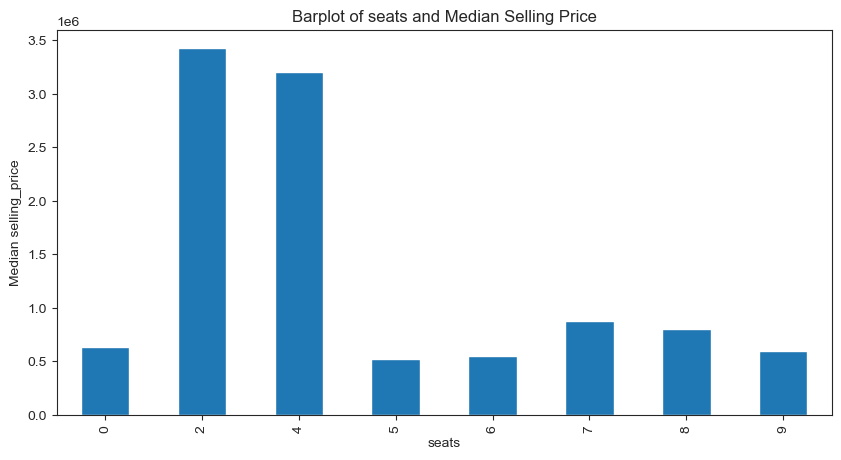

In [243]:
fig = plt.figure(figsize = (10,5))
df.groupby(discrete_features[0])['selling_price'].median().plot(kind='bar')
    
plt.xlabel(discrete_features[0])
plt.ylabel("Median selling_price")
plt.title(f"Barplot of {discrete_features[0]} and Median Selling Price")
plt.show()

**Report**
* Median prices are highest for 2-seater and 4-seater cars.

### Visualization

#### Visualizing Target Variable

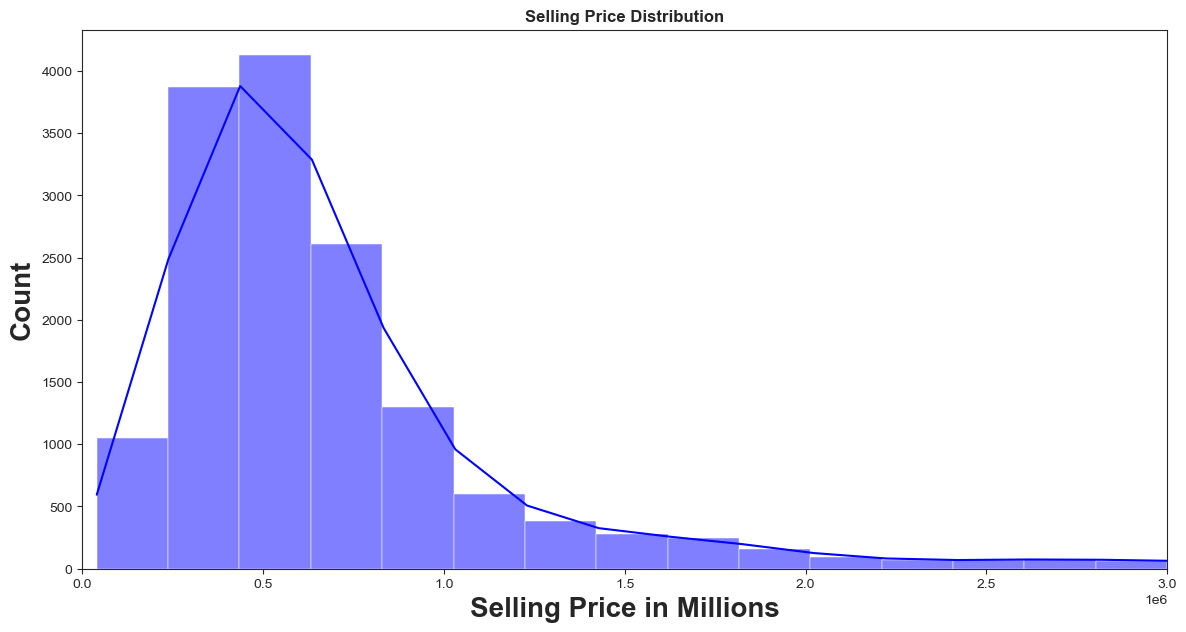

In [244]:
plt.subplots(figsize=(14,7))
sns.histplot(df['selling_price'], bins=200, kde=True, color='b')
plt.title('Selling Price Distribution', weight='bold')
plt.ylabel('Count',weight='bold', fontsize=20)
plt.xlabel('Selling Price in Millions', weight='bold', fontsize=20)
plt.xlim(0,3000000)
plt.show()

**Report**
* selling_price is right skewed

### Top 10 Most Sold Cars

In [245]:
df['car_name'].value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

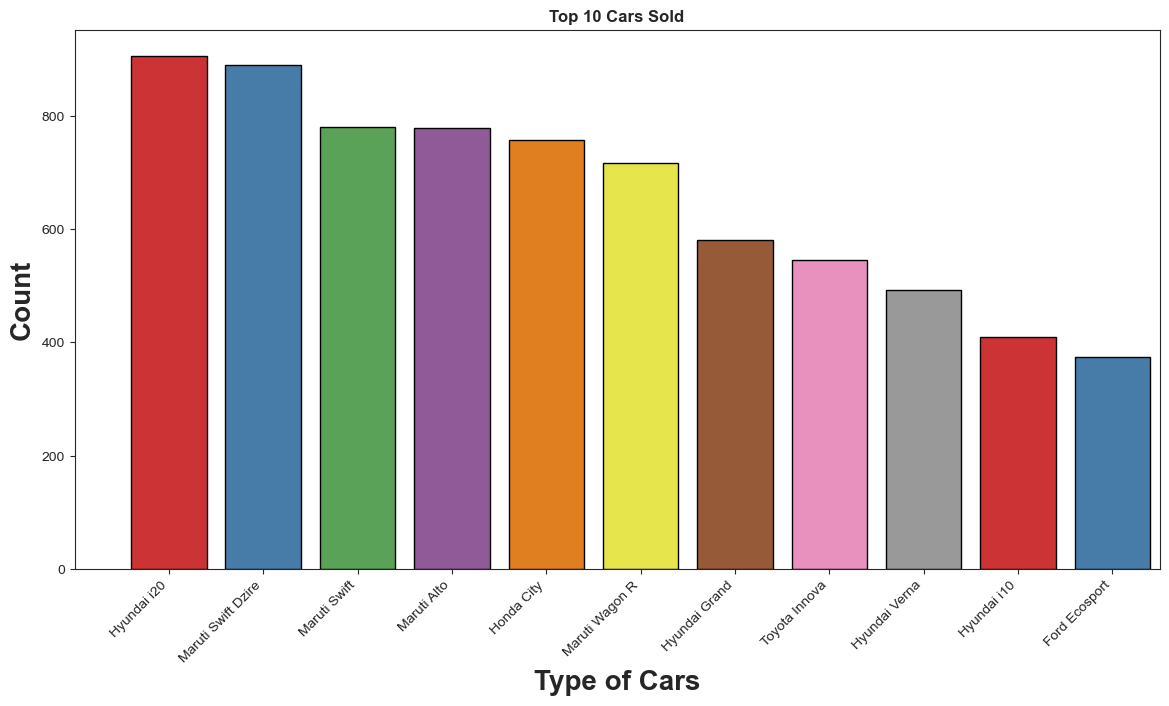

In [246]:
plt.subplots(figsize=(14,7))
sns.countplot(data = df, x='car_name', ec = 'black', palette='Set1', order = df['car_name'].value_counts().index) 
plt.title('Top 10 Cars Sold', weight='bold')
plt.ylabel('Count',weight='bold', fontsize=20)
plt.xlabel('Type of Cars', weight='bold', fontsize=20)
plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Mean Price of Hyundai i20**

In [247]:
mean_price = df[df['car_name']=='Hyundai i20']['selling_price'].mean()
print(f"Mean price of Hyundai i20 is INR {mean_price:.2f} ")

Mean price of Hyundai i20 is INR 543603.75 


### Top 10 Most Sold Brands

In [248]:
df['brand'].value_counts()[0:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

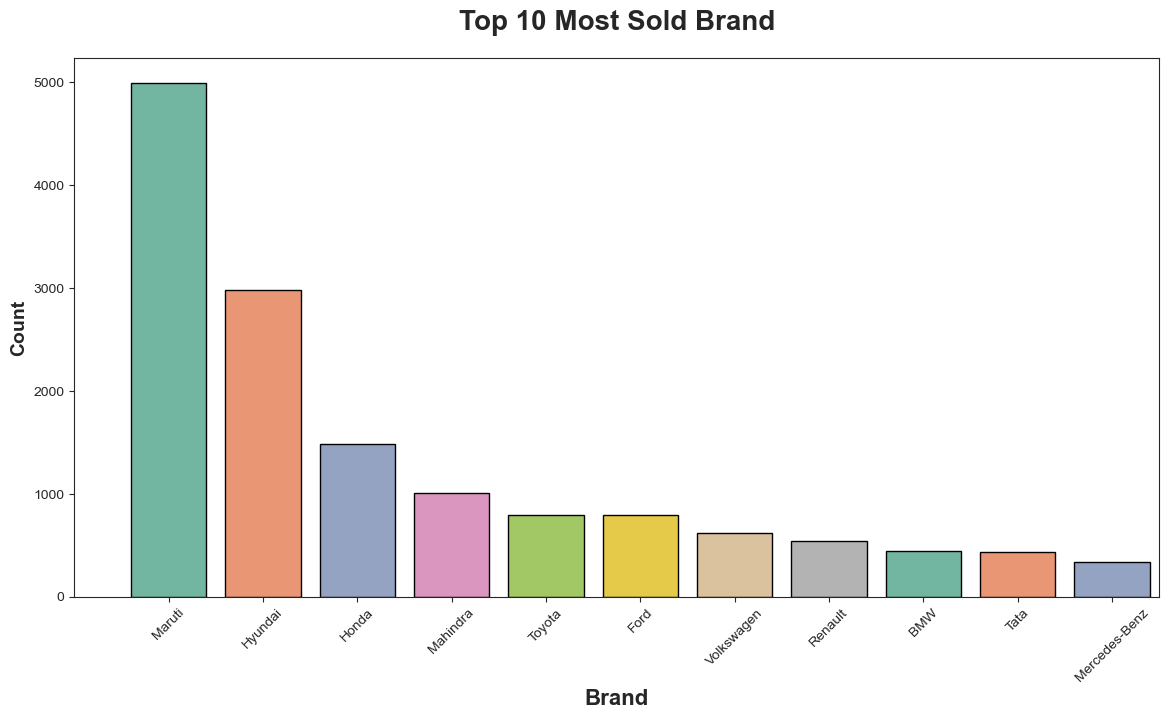

In [249]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [250]:
mean_price = df[df['brand']=='Maruti']['selling_price'].mean()
print(f"Mean price of Maruti is INR {mean_price:.2f} ")

Mean price of Maruti is INR 487089.32 


**Report:**
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

### Costliest Brand

In [251]:
brand = df.groupby('brand')['selling_price'].max()
brand.sort_values(ascending=False)

brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Jaguar            6300000
Maserati          6200000
Jeep              5600000
Mercedes-AMG      5100000
Mini              3875000
Toyota            3650000
Skoda             3550000
Kia               3525000
Ford              3200000
Honda             3200000
Mahindra          2950000
Hyundai           2600000
Isuzu             2300000
MG                2075000
ISUZU             1900000
Tata              1750000
Nissan            1450000
Volkswagen        1250000
Maruti            1225000
Renault           1155000
Force              700000
Datsun             650000
Name: selling_price, dtype: int64

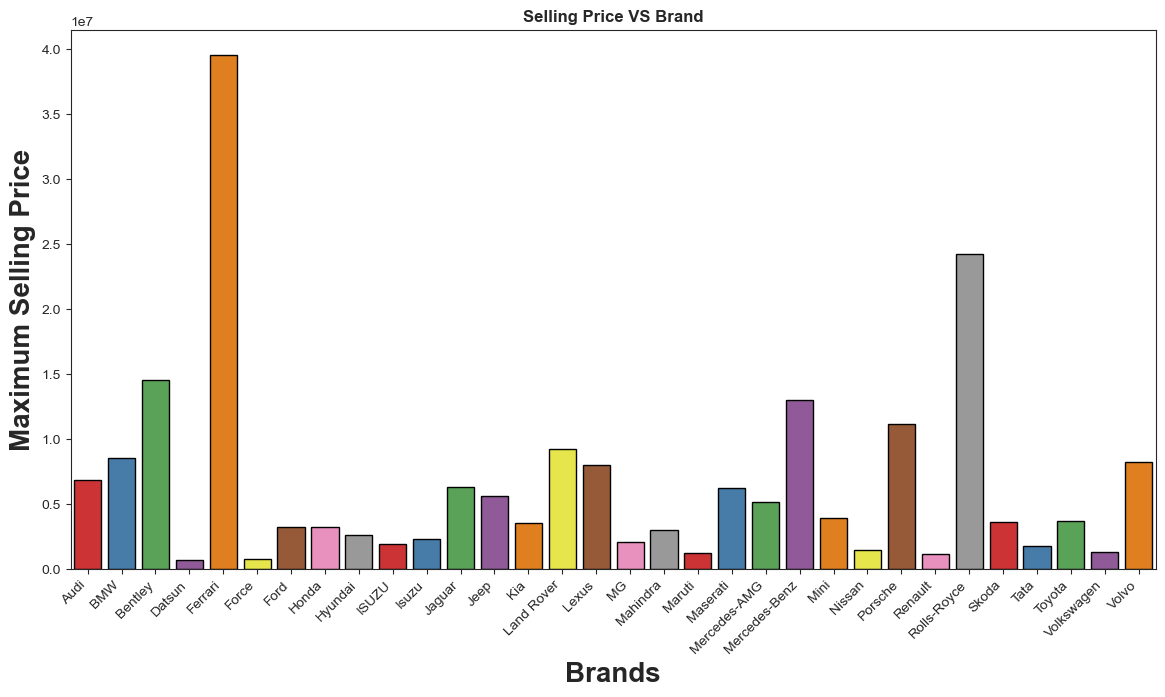

In [252]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values, ec = 'black', palette='Set1') 
plt.title('Selling Price VS Brand', weight='bold')
plt.ylabel('Maximum Selling Price',weight='bold', fontsize=20)
plt.xlabel('Brands', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* Costliest brand sold is Ferrari at INR 3.9 crores
* Rolls Royce is at second with INR 2.42 crores

### Costliest Car

In [253]:
car = df.groupby('car_name')['selling_price'].max()
car

car_name
Audi A4             4200000
Audi A6             4600000
Audi A8             5500000
Audi Q7             6800000
BMW 3               4500000
                     ...   
Volkswagen Vento    1250000
Volvo S90           4750000
Volvo XC            8195000
Volvo XC60          1825000
Volvo XC90          6975000
Name: selling_price, Length: 121, dtype: int64

In [254]:
costliest_car_df = car.to_frame().sort_values('selling_price',ascending=False)[0:10]
costliest_car_df

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


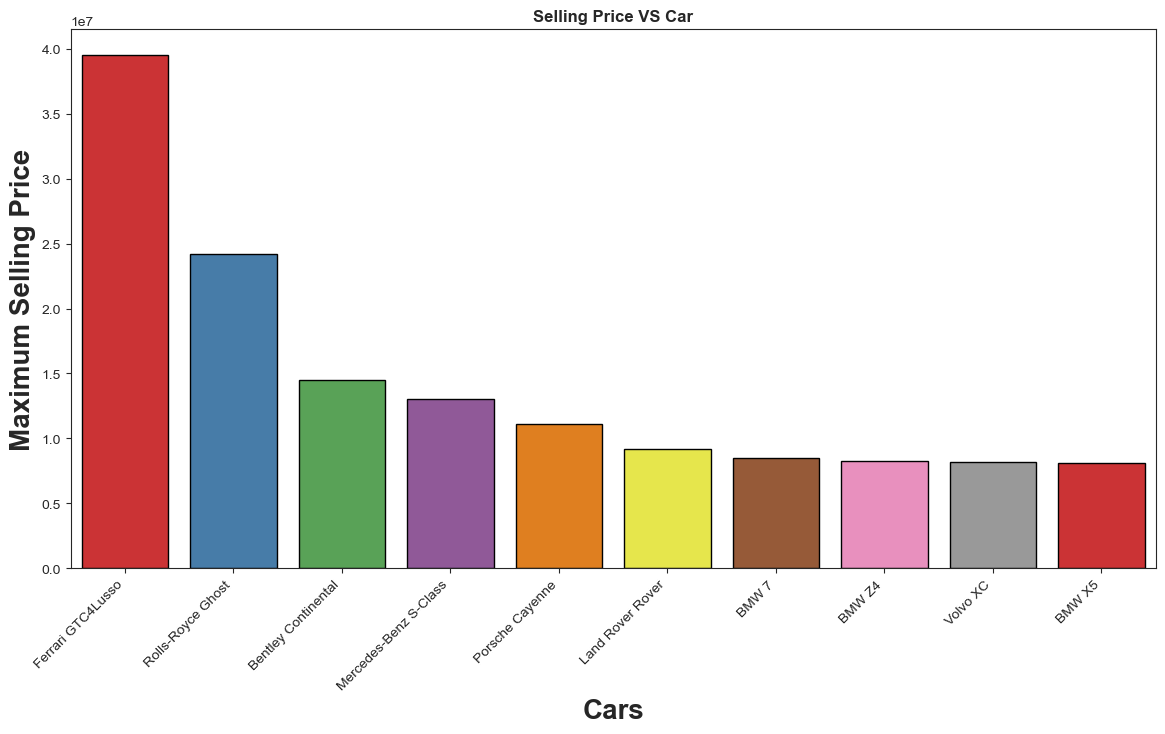

In [255]:
plt.subplots(figsize=(14,7))
sns.barplot(x=costliest_car_df.index, y=costliest_car_df.selling_price, ec = 'black', palette='Set1') 
plt.title('Selling Price VS Car', weight='bold')
plt.ylabel('Maximum Selling Price',weight='bold', fontsize=20)
plt.xlabel('Cars', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr.

### Brand VS Mileage

In [256]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


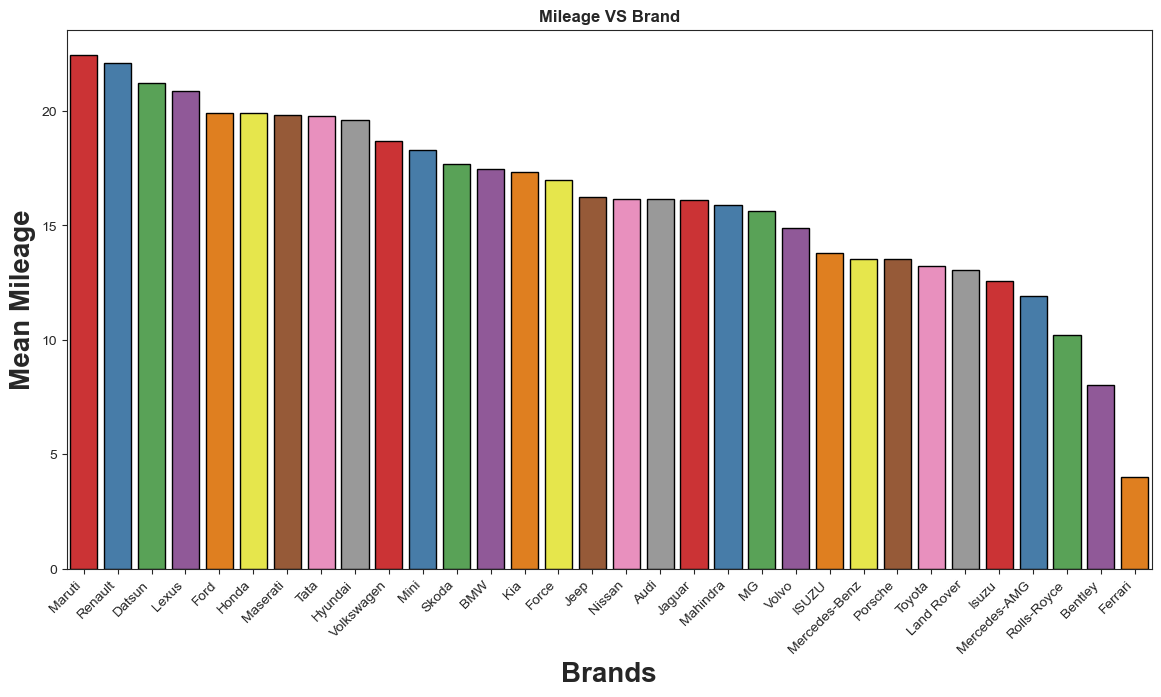

In [257]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = 'black', palette='Set1') 
plt.title('Mileage VS Brand', weight='bold')
plt.ylabel('Mean Mileage',weight='bold', fontsize=20)
plt.xlabel('Brands', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

### Car VS Mileage

In [258]:
#Top 15 cars with highest mean mileage
car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False)[0:15]
car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


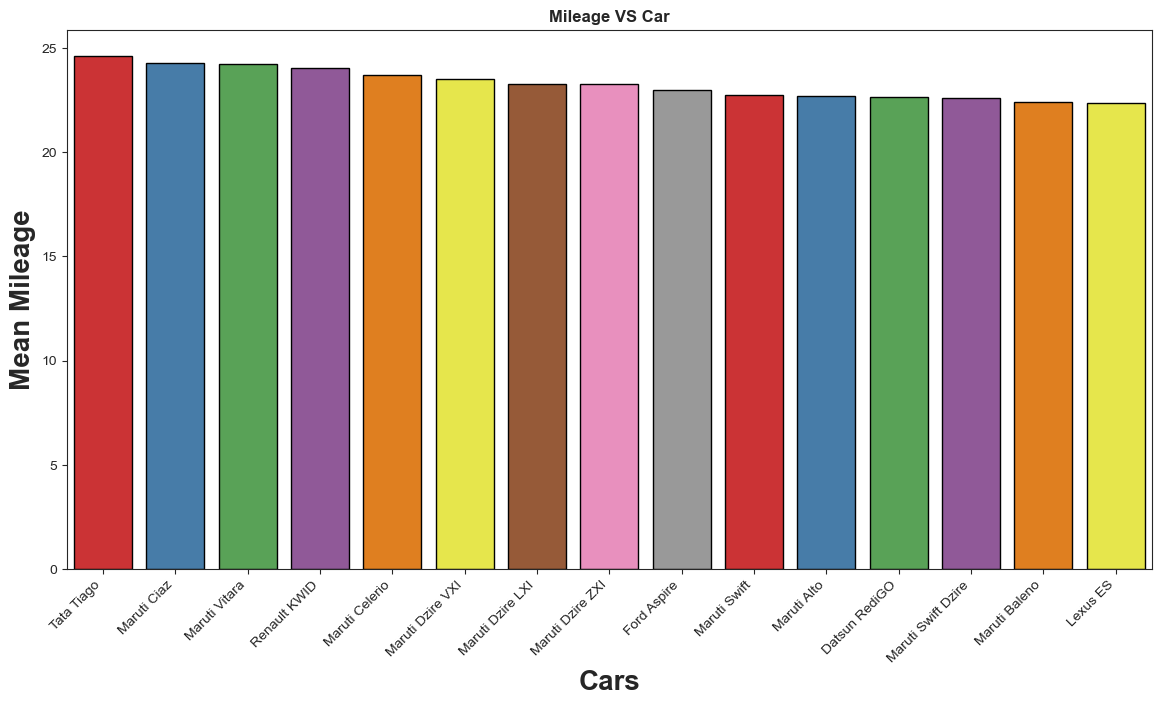

In [259]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.values, ec = 'black', palette='Set1') 
plt.title('Mileage VS Car', weight='bold')
plt.ylabel('Mean Mileage',weight='bold', fontsize=20)
plt.xlabel('Cars', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

### Fuel type and Selling Price

In [260]:
fuel_type = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending = False)
fuel_type

fuel_type
Electric    1857500.0
Diesel       700000.0
Petrol       460000.0
CNG          370000.0
LPG          182500.0
Name: selling_price, dtype: float64

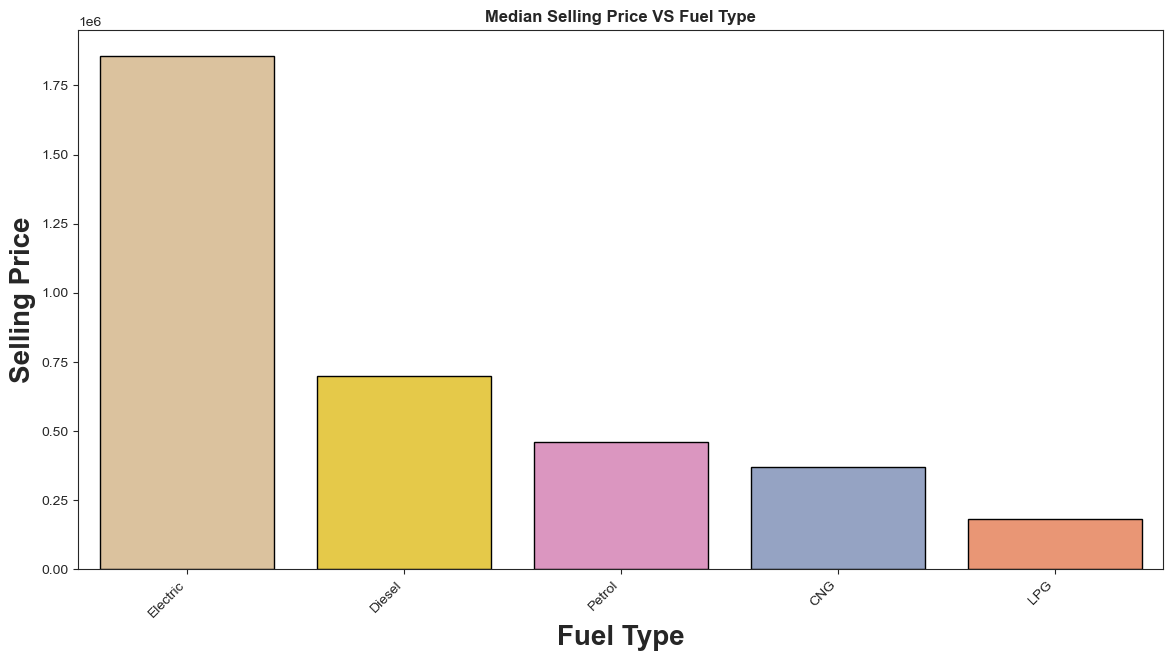

In [261]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel_type.index, y=fuel_type.values, ec = 'black', palette='Set2_r') 
plt.title('Median Selling Price VS Fuel Type', weight='bold')
plt.ylabel('Selling Price',weight='bold', fontsize=20)
plt.xlabel('Fuel Type', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* Electric cars has the highest median selling price.
* LPG run cars has the lowest median selling price.


### Most Sold Fuel Type

In [262]:
fuel_distri = df['fuel_type'].value_counts()
fuel_distri

Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64

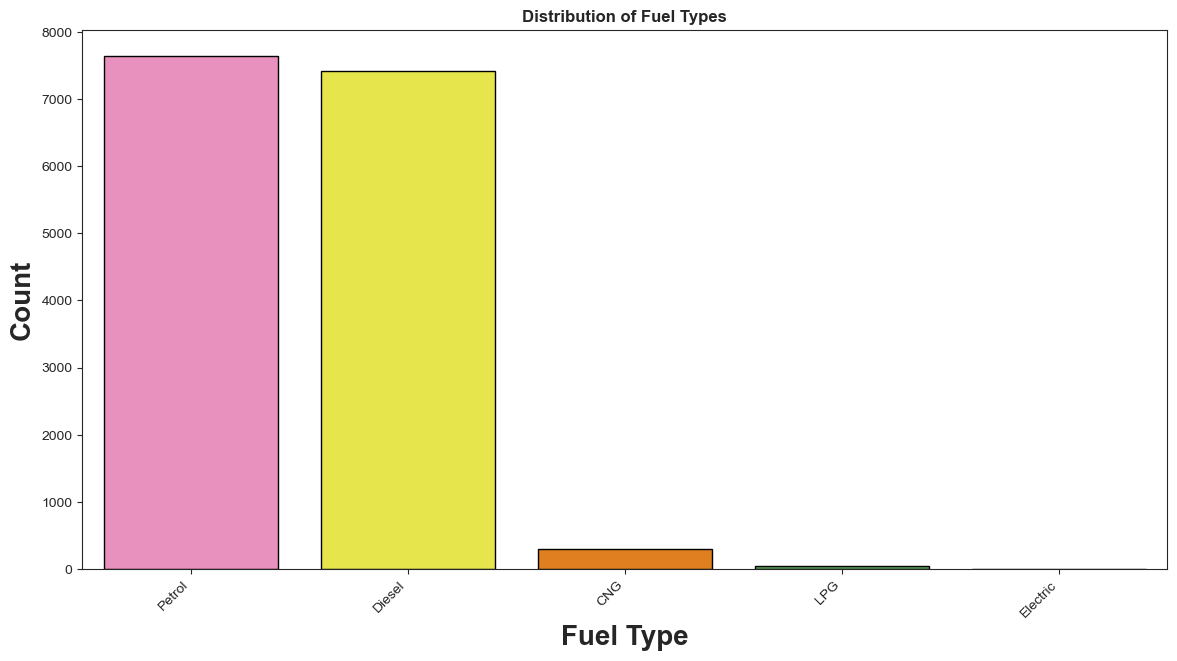

In [263]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df['fuel_type'], ec = 'black', palette='Set1_r') 
plt.title('Distribution of Fuel Types', weight='bold')
plt.ylabel('Count',weight='bold', fontsize=20)
plt.xlabel('Fuel Type', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* Petrol and Diesel run cars are sold the most.
* Electric cars are the least preferred.


### Fuel types and Mileage 

In [264]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


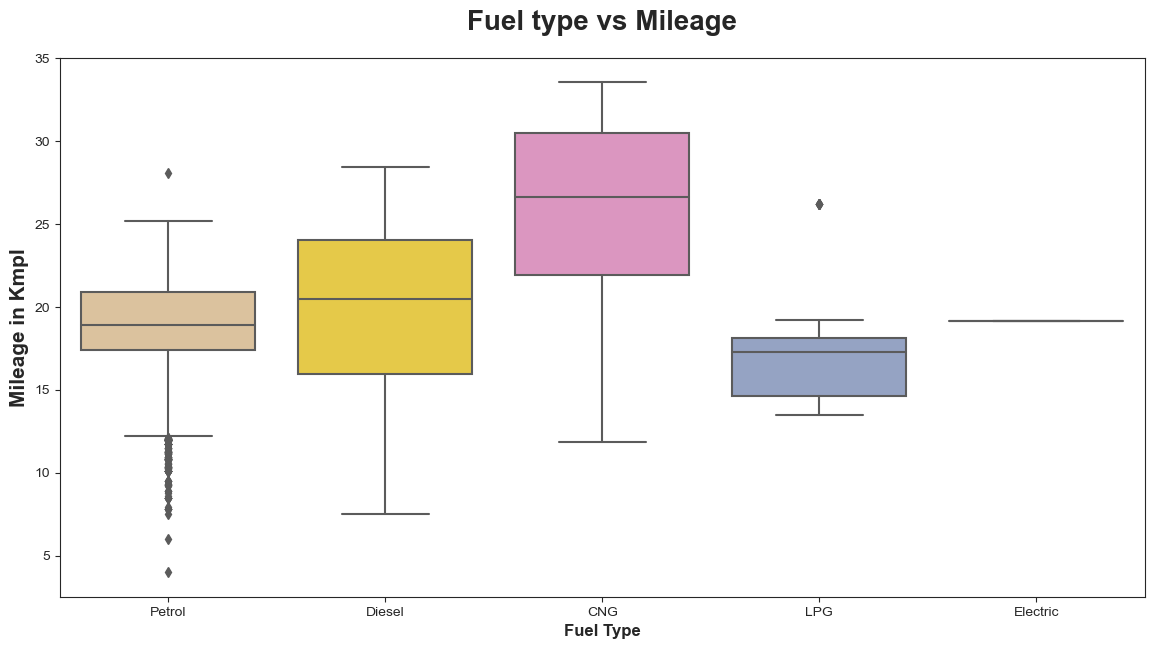

In [265]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df['fuel_type'], y=df['mileage'],palette="Set2_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Mileage vs Selling Price

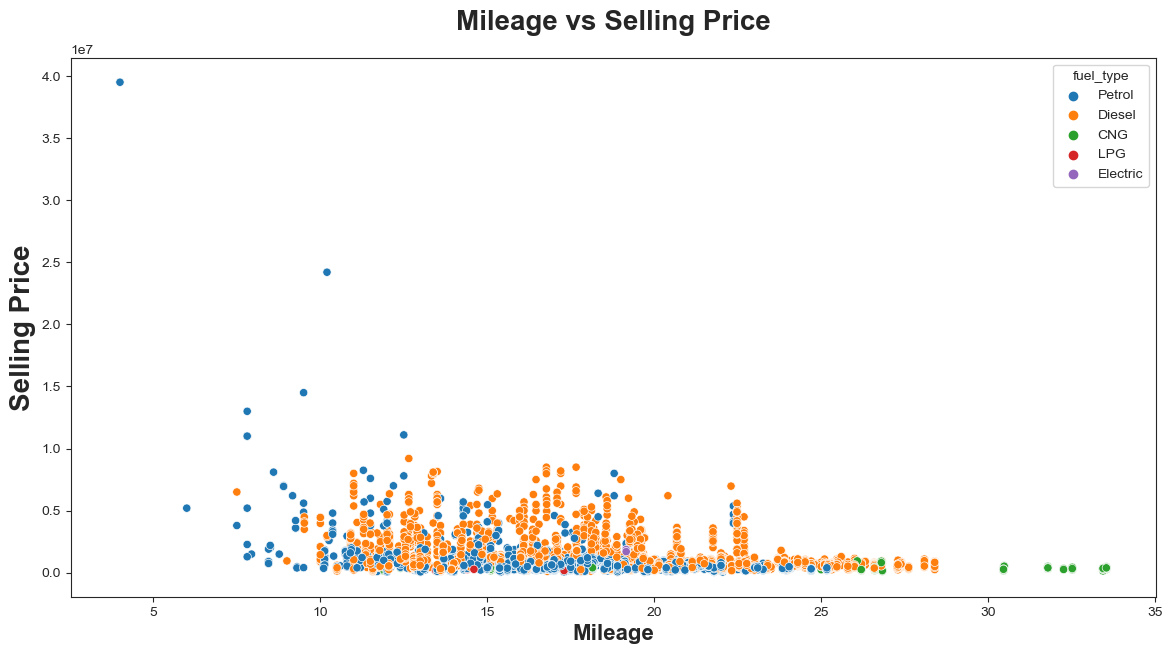

In [266]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x=df["mileage"], y=df["selling_price"],color='g', hue=df["fuel_type"])
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

### Vehicle age vs Selling Price

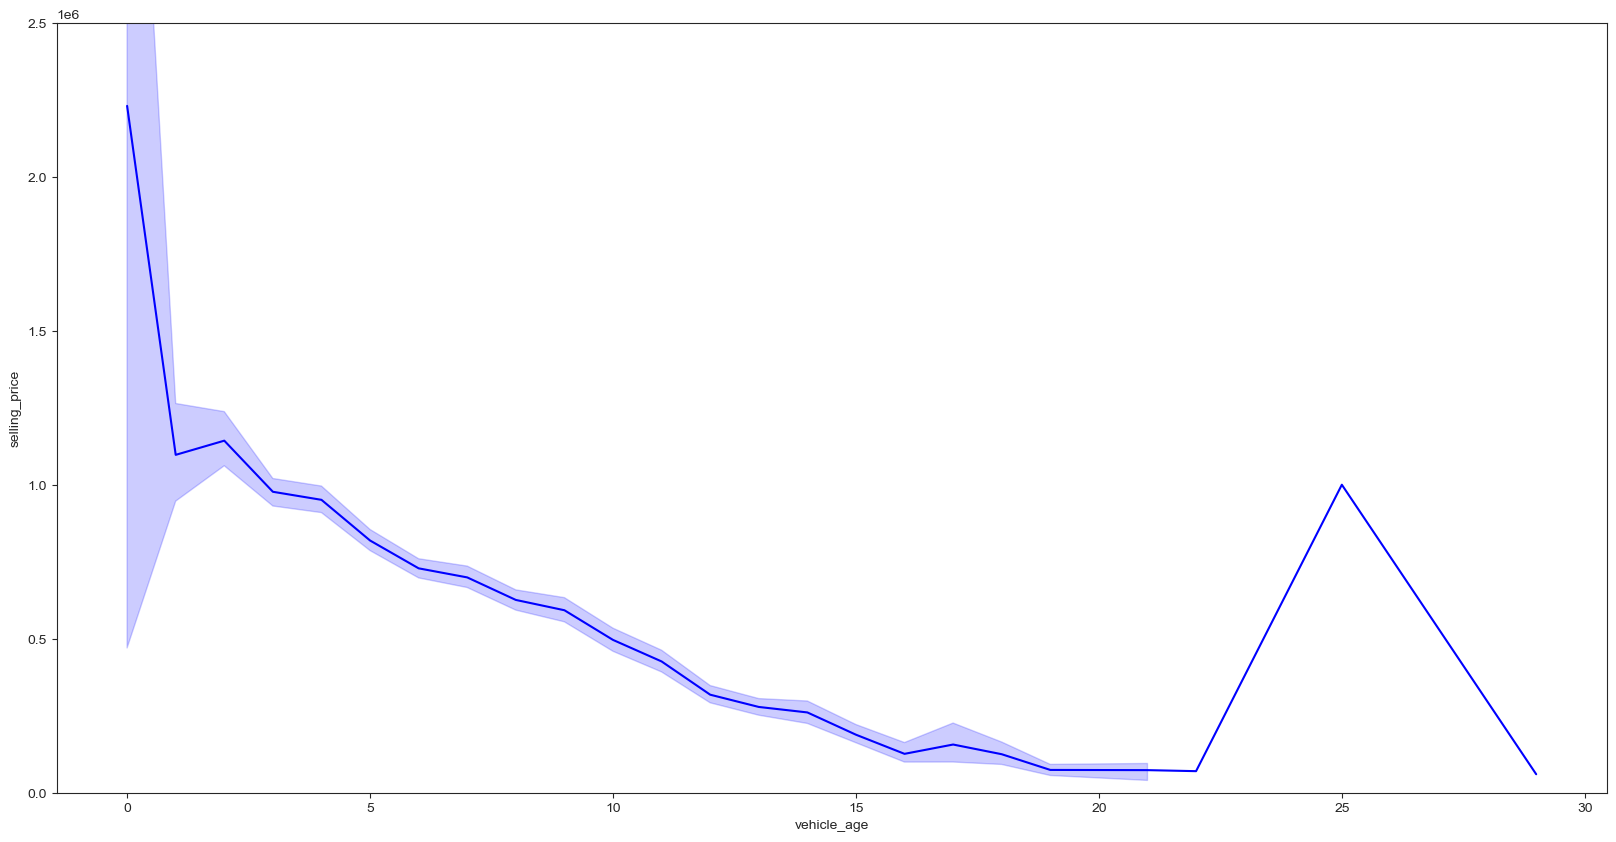

In [267]:
plt.subplots(figsize=(20,10))
sns.lineplot(x=df["vehicle_age"],y=df["selling_price"],color='b')
plt.ylim(0,2500000)
plt.show()

### Vehicle age vs Mileage

In [268]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(15)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51
6,20.14
7,20.00
1,20.00
2,19.60


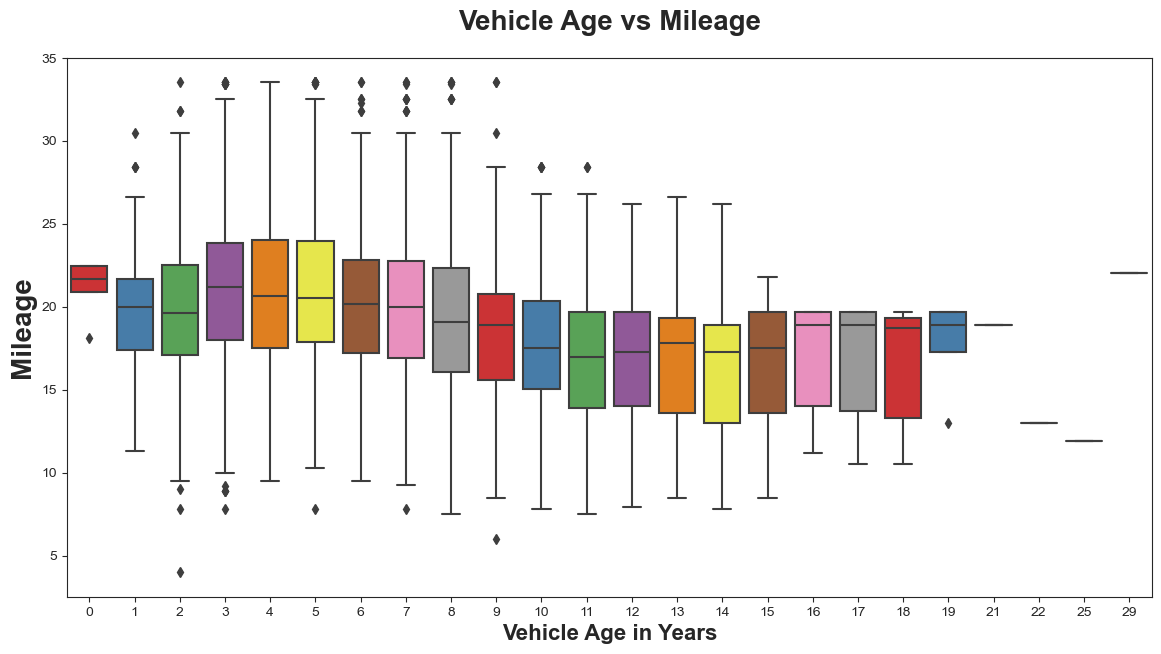

In [269]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df["vehicle_age"], y= df["mileage"], palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

**Report** 
* With increase in the Age of vehicle the median of mileage drops.
* Newer Vehicles have more mileage median older vehicle.

### Transmission Type

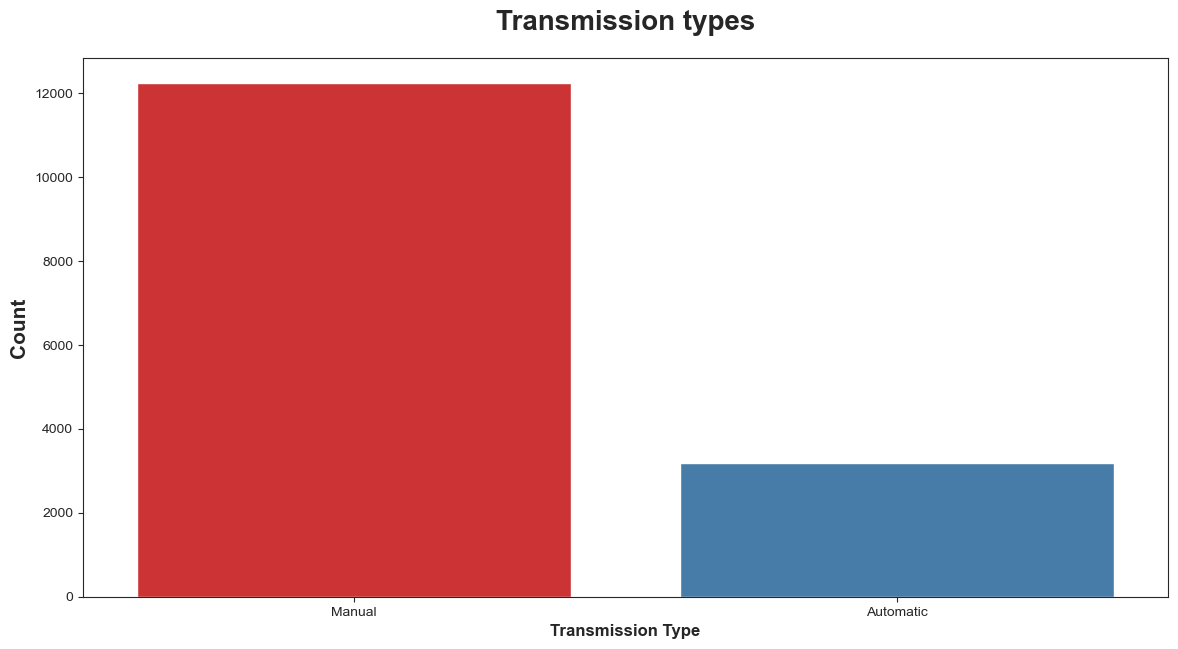

In [270]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission types", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

**Selling Price vs Transmission type**

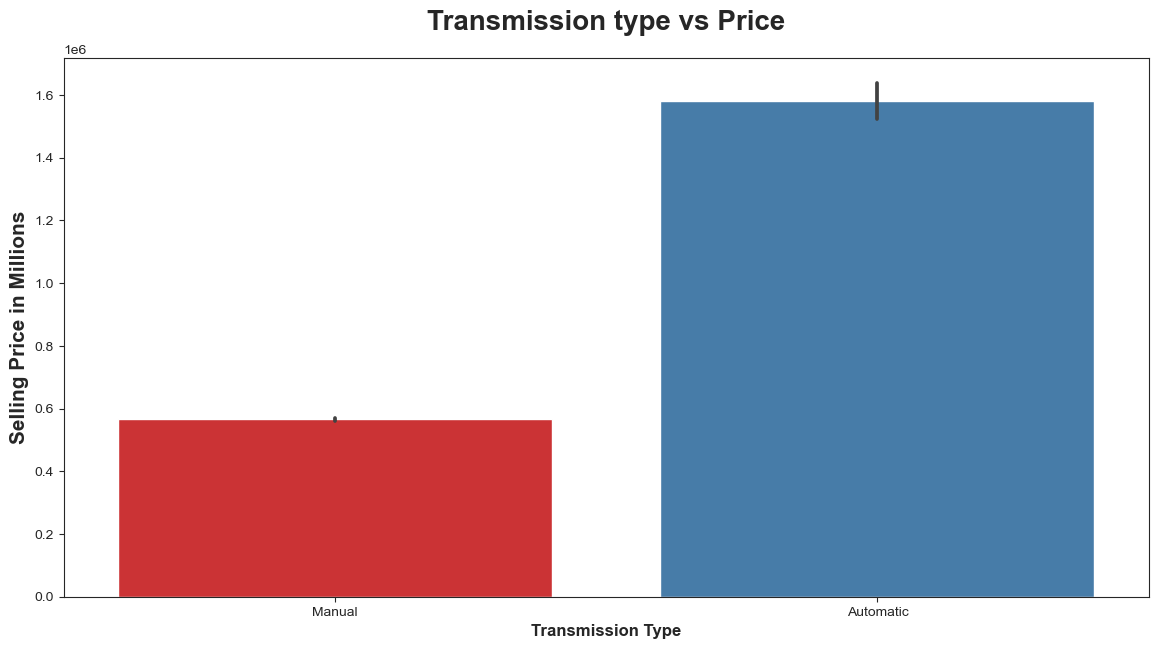

In [271]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df["transmission_type"], y=df["selling_price"],palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

### Seller Types

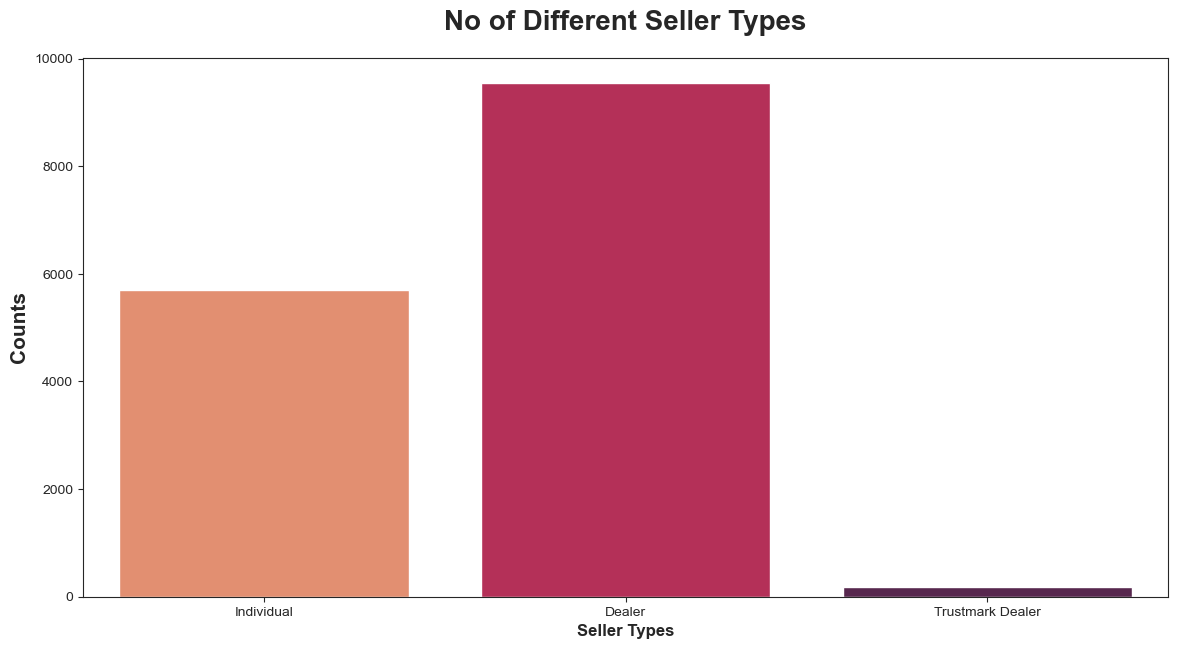

In [272]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("No of Different Seller Types", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Seller Types", weight="bold", fontsize=12)
plt.show()

**Selling Price vs Seller Types**

In [273]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)

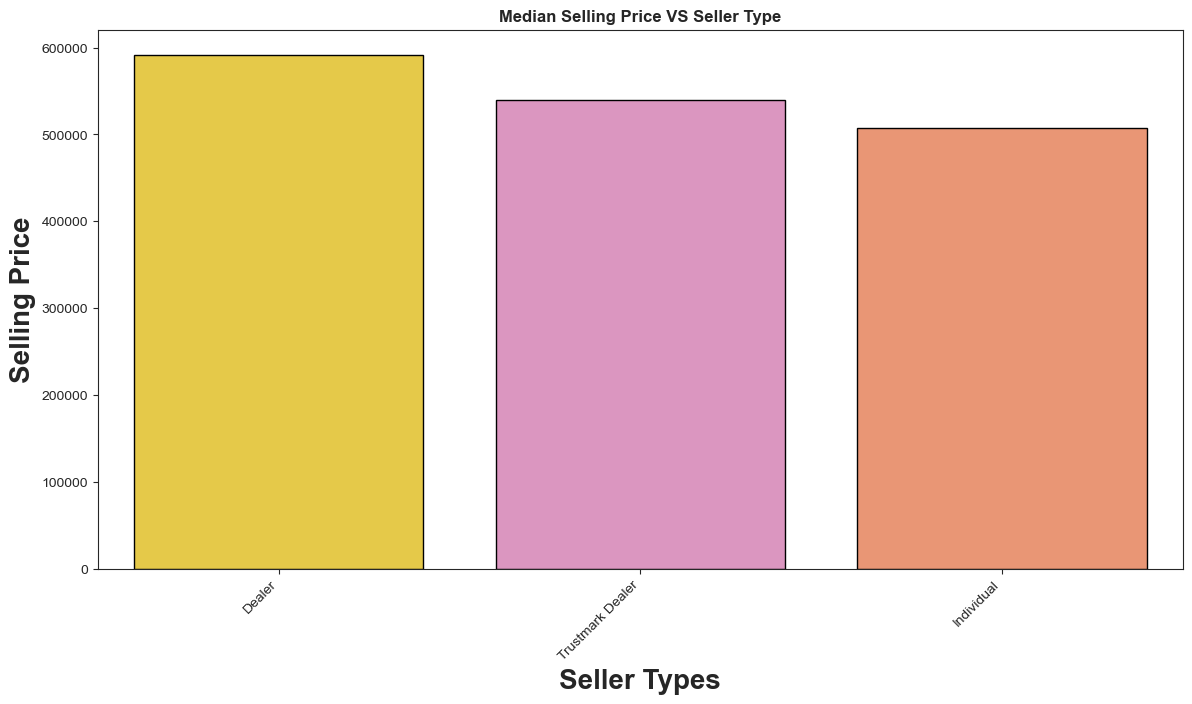

In [274]:
plt.subplots(figsize=(14,7))
sns.barplot(x=dealer.index, y=dealer.values, ec = 'black', palette='Set2_r') 
plt.title('Median Selling Price VS Seller Type', weight='bold')
plt.ylabel('Selling Price',weight='bold', fontsize=20)
plt.xlabel('Seller Types', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* Dealers have median selling price of 5.91 Lakhs.
* Followed by Trusted Dealers with median selling price of 5.4 Lakhs.
* Trusted Dealers have more median selling price than Individual.


## Summary of EDA

* There are 15411 rows and 13 columns
* The selling_price column is the target variable, which is a continuous feature. Hence, it is a regression problem
* There are outliers in the km_driven, enginer, selling_price, and max power.
* Dealers are the highest sellers of the used cars.
* Skewness is found in few of the columns will check it after handling outliers.
* Vehicle age has inverse relation on the price.
* Manual cars are mostly sold and automatic has higher selling average than manual cars.
* Petrol is the most preffered choice of fuel in used car website, closely followed by diesel.


## 4) Data Cleaning

### Handling Null Values

In [275]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**Since we have no null values, it is handled**

### Handling Duplicates

In [276]:
df = df.drop_duplicates()


In [277]:
df.shape

(15244, 13)

**We have dropped duplicates, now the shape of dataframe is (15244,13)**

## 5) Data Pre-processing

In [278]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


**Since column 'car_name' is just a combination of columns 'brand' and 'model', we are dropping it.**

In [279]:
print(df.shape)
df.drop('car_name', axis=1, inplace=True)
print(df.shape)

(15244, 13)
(15244, 12)


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15244 entries, 0 to 19543
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15244 non-null  object 
 1   model              15244 non-null  object 
 2   vehicle_age        15244 non-null  int64  
 3   km_driven          15244 non-null  int64  
 4   seller_type        15244 non-null  object 
 5   fuel_type          15244 non-null  object 
 6   transmission_type  15244 non-null  object 
 7   mileage            15244 non-null  float64
 8   engine             15244 non-null  int64  
 9   max_power          15244 non-null  float64
 10  seats              15244 non-null  int64  
 11  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


### Multicollinearity check with Variance Inflation Factor

**We use VIF in order to make decision regarding variable's removal.**

In [281]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


def calculate_vif(df, independent_cols):
 
    X = df[independent_cols].copy()  # Copy to avoid modifying original dataframe
    X = pd.get_dummies(X, drop_first=True)  # Handle categorical variables (optional)
    X['Intercept']= 1

    vif_values = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]
    vif_series = pd.Series(vif_values, index=X.columns[:])
    
    
    
      

    return vif_series



In [282]:
df1 = df.copy()

In [283]:
df1 = df1.drop('selling_price',axis=1)
numerical_features_1 = [feature for feature in df1.columns if df1[feature].dtypes !='object']

In [284]:
vif_list = calculate_vif(df1,numerical_features_1)

In [285]:
vif_list.to_frame()

,0
vehicle_age,1.275999
km_driven,1.205781
mileage,1.930582
engine,6.234518
max_power,4.500965
seats,2.247441
Intercept,201.344209


*We ignore Intercept*

**We can see none of the VIF's are above 10, hence no need to remove any of the features**


### Handling Outliers 

**We will check outliers in the Continuous Features**

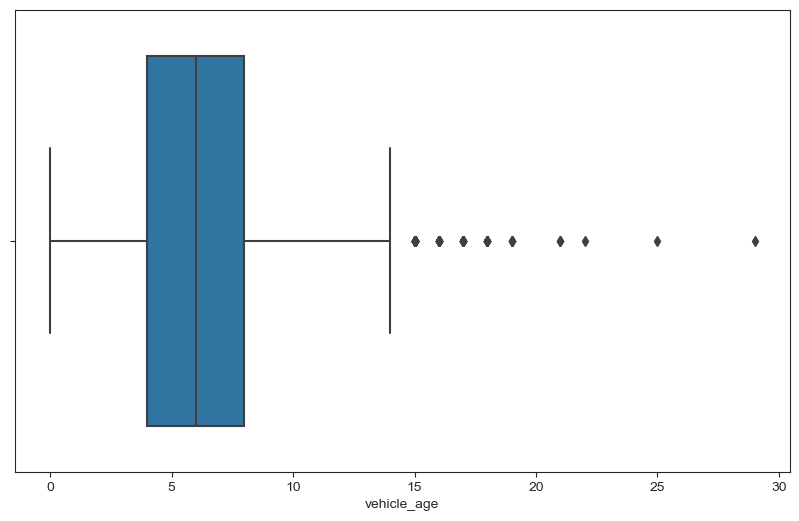

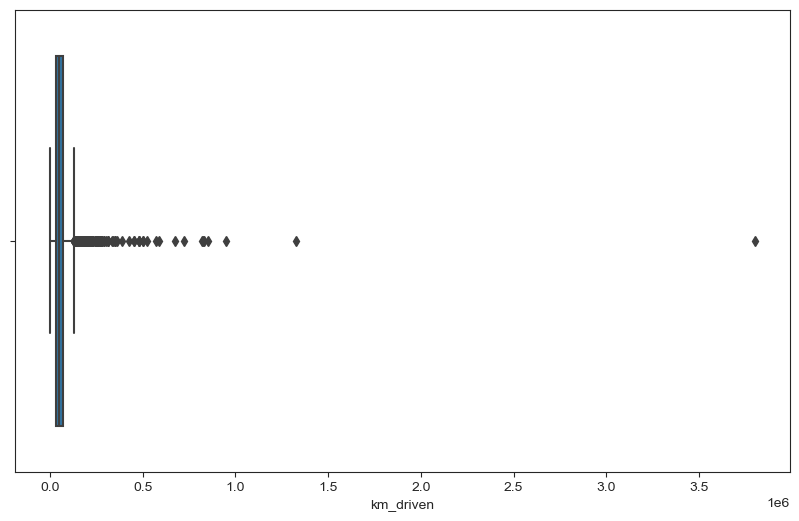

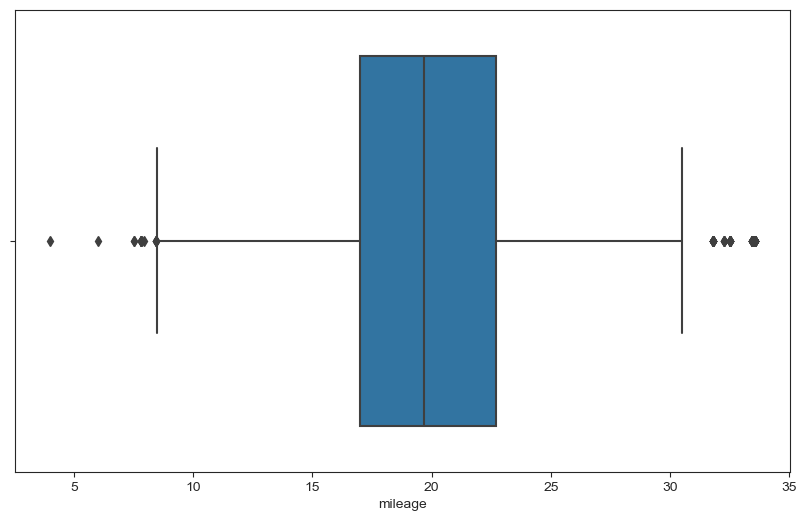

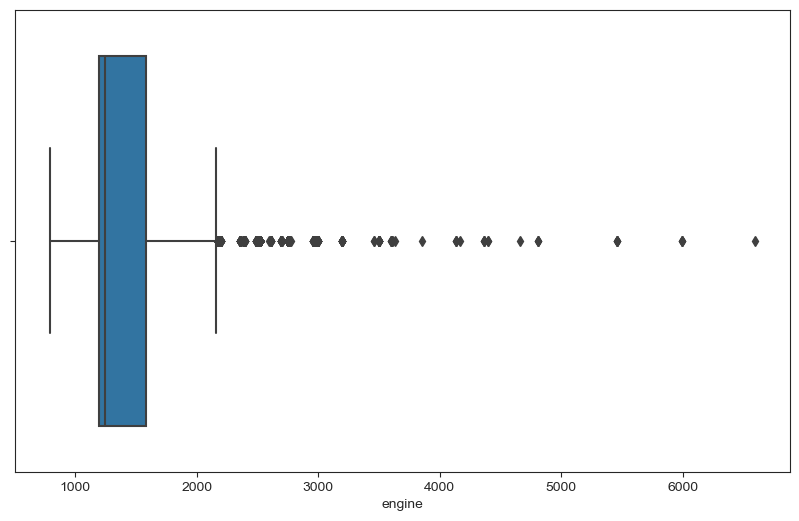

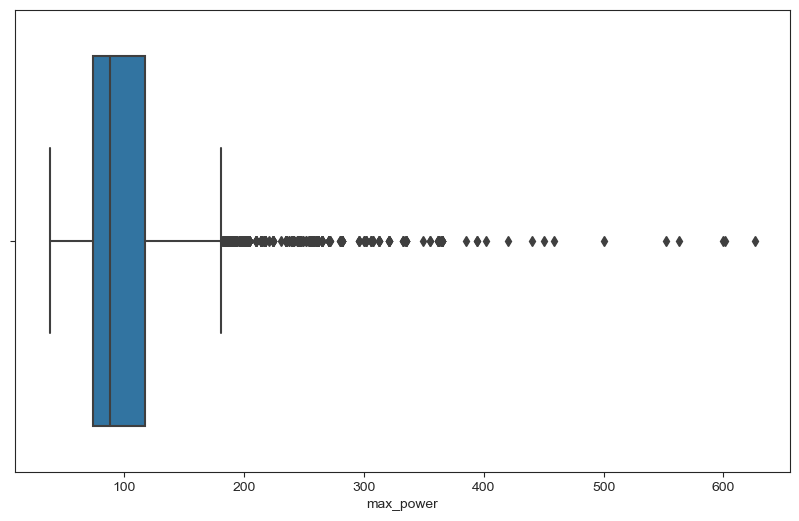

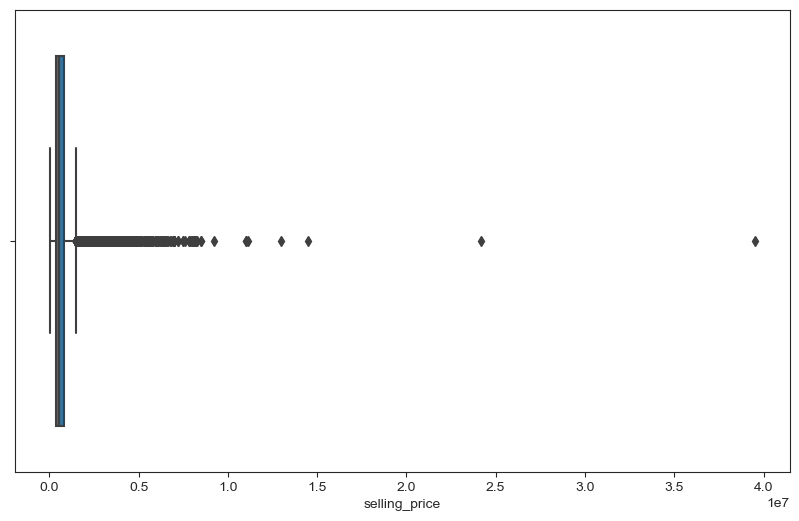

In [286]:
for i in continuous_features:
    plt.figure(figsize=(10,6))
    sns.set_style('ticks')
    ax = sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
        

**We can see outliers are present in all the continuous features**

### Capping Outliers

In [287]:
def capping_outliers(col):
    #Finding InterQuartile Range
    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    print("***** ",col," *****")
    print(f"The 25th percentile is {percentile_25}")
    print(f"The 75th percentile is {percentile_75}")
    IQR = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5*(IQR)
    lower_limit = percentile_25 - 1.5*(IQR)
    print(f"Upper Limit is {upper_limit}")
    print(f"Lower Limit is {lower_limit}")
    df.loc[df[col]>upper_limit,col] = upper_limit
    df.loc[df[col]<lower_limit,col] = lower_limit
    
    return df
    
    

In [288]:
for col in continuous_features:
    capping_outliers(col)

*****  vehicle_age  *****
The 25th percentile is 4.0
The 75th percentile is 8.0
Upper Limit is 14.0
Lower Limit is -2.0
*****  km_driven  *****
The 25th percentile is 30000.0
The 75th percentile is 70000.0
Upper Limit is 130000.0
Lower Limit is -30000.0
*****  mileage  *****
The 25th percentile is 17.0
The 75th percentile is 22.7
Upper Limit is 31.25
Lower Limit is 8.450000000000001
*****  engine  *****
The 25th percentile is 1197.0
The 75th percentile is 1582.0
Upper Limit is 2159.5
Lower Limit is 619.5
*****  max_power  *****
The 25th percentile is 74.0
The 75th percentile is 117.3
Upper Limit is 182.25
Lower Limit is 9.050000000000011
*****  selling_price  *****
The 25th percentile is 385000.0
The 75th percentile is 825000.0
Upper Limit is 1485000.0
Lower Limit is -275000.0


**We have capped the outliers, instead of removing them**

In [289]:
df[continuous_features].skew(axis=0, skipna=True)*100

vehicle_age       66.585765
km_driven         61.539374
mileage            7.257839
engine            68.386462
max_power        106.616996
selling_price     96.793989
dtype: float64

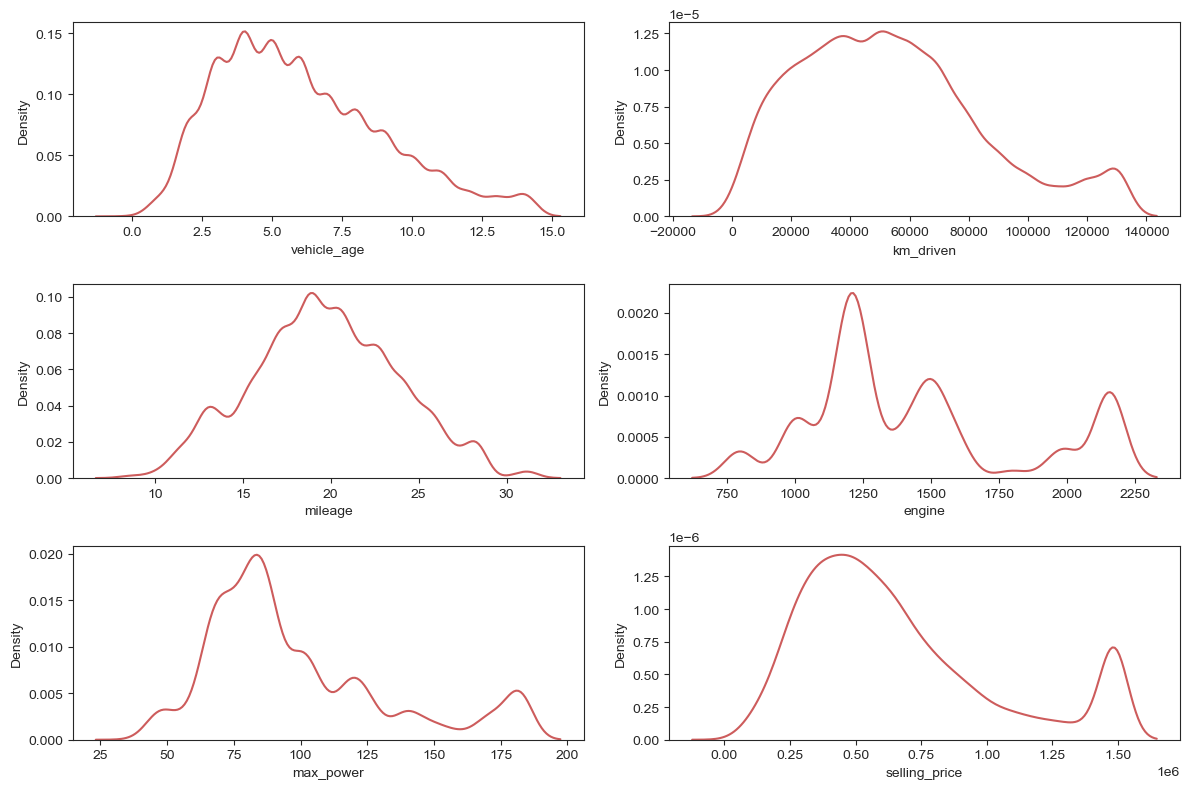

In [291]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['vehicle_age','km_driven', 'mileage', 'engine', 'max_power', 'selling_price']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**After outliers capping, distribution has become more normal than before. Remember, earlier it was Right Skewed.**

**No further transformation needed**

## 6) Model Training

In [292]:
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [296]:
categorical_features.remove('car_name')

In [297]:
for feature in categorical_features:
    print(feature,':', X[feature].nunique())

brand : 32
model : 120
seller_type : 3
fuel_type : 5
transmission_type : 2


**We need to keep only those brands which have sufficient number of observations.**

In [300]:
X.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5


In [302]:
top_15_brands = X['brand'].value_counts(ascending=False).head(15)


Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Name: brand, dtype: int64

In [303]:
for i in range(df.shape[0]):
    if X['brand'].iloc[i] in brand:
         continue
    else:
        X['brand'].iloc[i] = 'Others'

### Encoding and Scaling

**We are using Standard Scaler for numerical features, One Hot Encoding for categorical variables with
less number of unique values and Binary Encoder for categorical variables with high number of unique values**

In [310]:
X.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5


In [312]:
numerical_features.remove('selling_price')

In [313]:
onehot_columns = ['seller_type','fuel_type','transmission_type']
binary_columns = ['brand', 'model']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, numerical_features),
        ("BinaryEncoder", binary_transformer, binary_columns)
        
    ]
)

In [314]:
X= preprocessor.fit_transform(X)

### Train Test Split

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(12195, 28)
(3049, 28)


### Model Selection

**We will try multiple regression modelling technique and will choose 4 with highest accuracy for 
hyperparameter tuning**

In [327]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

**Creating an evaluate function**

In [341]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    
    return mae, rmse, r2_square

In [343]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

models_test_mae = {}
models_test_rmse = {}
models_test_r2_square  = {}
  
for i in range(0,len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Accuracy
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    models_test_mae[list(models.keys())[i]] =  model_test_mae
    models_test_rmse[list(models.keys())[i]] =  model_test_rmse
    models_test_r2_square[list(models.keys())[i]] =  model_test_r2
    
    
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 142275.3779
- Mean Absolute Error: 108529.6690
- R2 Score: 0.8542
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 140692.6024
- Mean Absolute Error: 105906.5623
- R2 Score: 0.8558


Lasso
Model performance for Training set
- Root Mean Squared Error: 142275.4014
- Mean Absolute Error: 108529.7789
- R2 Score: 0.8542
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 140692.0790
- Mean Absolute Error: 105903.0467
- R2 Score: 0.8558


Ridge
Model performance for Training set
- Root Mean Squared Error: 142277.2964
- Mean Absolute Error: 108542.5514
- R2 Score: 0.8542
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 140688.6944
- Mean Absolute Error: 105906.6161
- R2 Score: 0.8558


K-Neighbours Regressor
Model performance for Training set
- Root Mean Squared Error: 79754.5252
- Mean 

In [360]:
sorted_models_test_r2_square = dict(sorted(models_test_r2_square.items(), key=lambda item: item[1]))


In [361]:
sorted_models_test_r2_square = dict(reversed(sorted_models_test_r2_square.items()))

In [362]:
df_r2 = pd.DataFrame(list(sorted_models_test_r2_square.items()), columns=['Model', 'R2 Score'])

In [363]:
df_r2

,Model,R2 Score
0,CatBoosting Regressor,0.942901
1,XGBRegressor,0.937133
2,Random Forest Regressor,0.933080
3,K-Neighbours Regressor,0.923374
4,Decision Tree,0.889684
5,Ridge,0.855780
6,Lasso,0.855773
7,Linear Regression,0.855772
8,AdaBoost Regressor,0.802368


**We can see top 4 models with highest r2 are CatBoosting Regressor, XGBRegressor, Random Forest Regressor 
and K-Neighbours Regressor**

### Hyperparameter tuning

In [368]:
knn_params = {"n_neighbors" : [2,3,10,20,40,50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}
cat_params = {"learning_rate": [0.1, 0.01, 0.06, 0.05],
              "max_depth": [6, 8, 12, 20, 30]}


In [369]:
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                   ('CatBoost', CatBoostRegressor(verbose=False), cat_params)
                   ]

In [370]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 10}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
---------------- Best Params for CatBoost -------------------
{'max_depth': 8, 'learning_rate': 0.05}


### Using best parameters retraining whole models

In [373]:
models = {
   
    "K-Neighbours Regressor" : KNeighborsRegressor(n_neighbors=10),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=200, min_samples_split=8, max_features = 8, max_depth = None),
    "XGBRegressor" : XGBRegressor(n_estimators=100, max_depth = 8, learning_rate=0.1, colsample_bytree = 0.5),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False, max_depth = 8, learning_rate = 0.05)
}

models_test_mae_ht = {}
models_test_rmse_ht = {}
models_test_r2_square_ht  = {}
  
for i in range(0,len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Accuracy
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    models_test_mae_ht[list(models.keys())[i]] =  model_test_mae
    models_test_rmse_ht[list(models.keys())[i]] =  model_test_rmse
    models_test_r2_square_ht[list(models.keys())[i]] =  model_test_r2
    
    
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')


K-Neighbours Regressor
Model performance for Training set
- Root Mean Squared Error: 89299.7836
- Mean Absolute Error: 60713.9822
- R2 Score: 0.9426
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 101628.2102
- Mean Absolute Error: 68924.9549
- R2 Score: 0.9247


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 64710.2534
- Mean Absolute Error: 45397.3391
- R2 Score: 0.9698
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 91607.0606
- Mean Absolute Error: 63820.5782
- R2 Score: 0.9389


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 65576.9816
- Mean Absolute Error: 47856.9623
- R2 Score: 0.9690
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 90673.5418
- Mean Absolute Error: 62935.2849
- R2 Score: 0.9401


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 

## Best Model

In [376]:
best_model = CatBoostRegressor(max_depth=8, learning_rate=0.05 ,verbose=False)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)

print("FINAL MODEL 'CatBoost'")
print ("r2 Score value: {:.4f}".format(score))

FINAL MODEL 'CatBoost'
r2 Score value: 0.9427
